
# **The Spark Foundation Data Science and Business Analytics Internship- Arya B**


## **Task 1 : Student Academic Score Prediction**

![](http://i0.wp.com/image.shutterstock.com/image-vector/illustration-kids-reading-each-book-260nw-1948613470.jpg) 


#### This task involves regression analysis with the goal of predicting a student's percentage score based on their study hours. The dataset consists of two columns: "Hours," indicating the study hours, and "Scores," reflecting the corresponding exam percentage scores.

#### **Dataset: The given dataset represents a subset showcasing pairs of study hours and their corresponding percentage scores.**

#### **Objective: Construct a model to predict a student's percentage score using their study hours.**


## **Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## **Load The Dataset**

In [2]:
# Load the dataset
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

# Display the first few rows of the dataset
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Get information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Descriptive statistics of the dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Shape of the dataset (number of rows and columns)

df.shape

(25, 2)

In [6]:
# Check for null values in the dataset

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null values.

## **Exploratory Data Analysis**

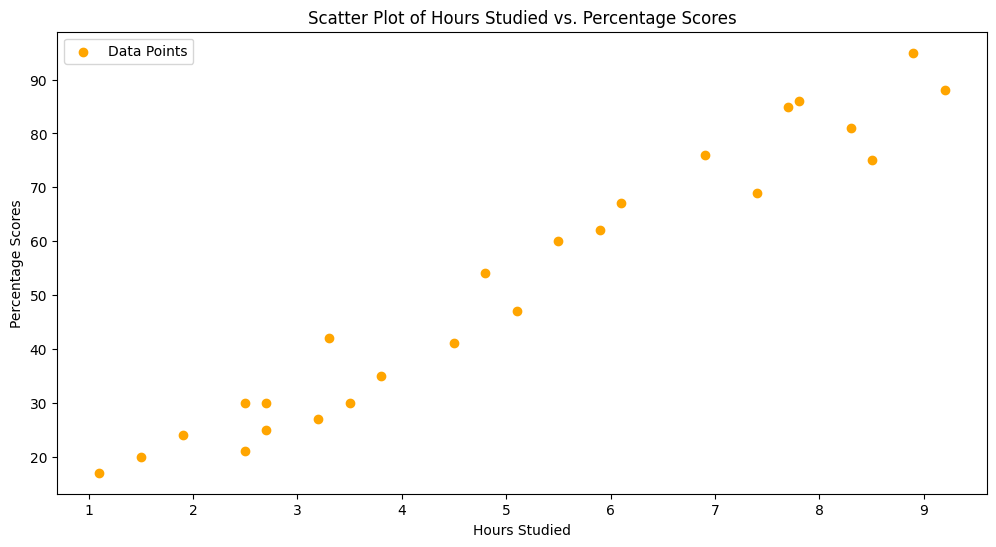

In [7]:
# create a scatter plot
plt.figure(figsize=(12,6))
plt.scatter(df['Hours'],df['Scores'],c='orange',marker='o',label='Data Points')
plt.title('Scatter Plot of Hours Studied vs. Percentage Scores')
plt.xlabel("Hours Studied")
plt.ylabel('Percentage Scores')
plt.legend()

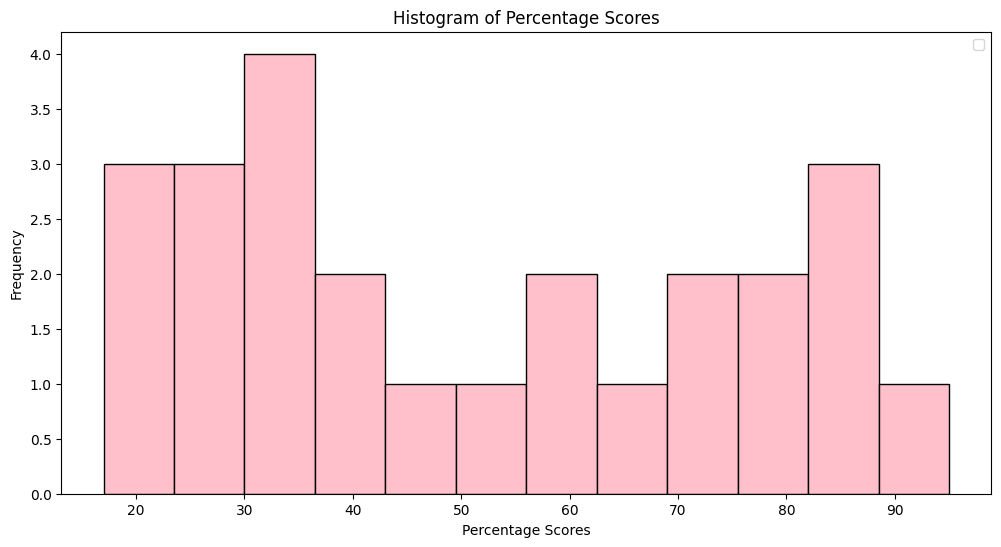

In [8]:
# Create a histogram of percentage Scores

plt.figure(figsize=(12,6))
plt.hist(df['Scores'],bins=12,color='pink',edgecolor='black')
plt.title("Histogram of Percentage Scores")
plt.xlabel("Percentage Scores")
plt.ylabel("Fmetricsrequency")
plt.legend()
plt.show()

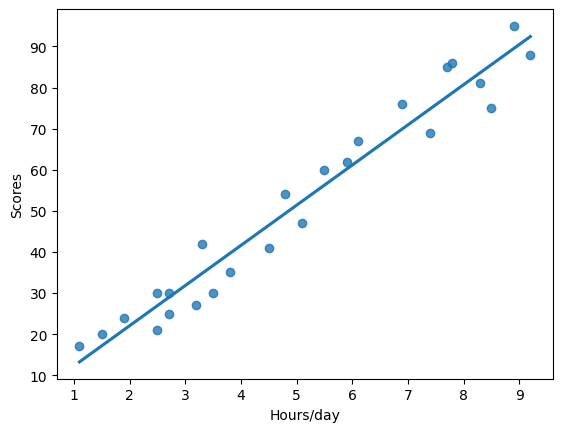

In [9]:
sns.regplot(data=df,x='Hours',y='Scores',ci=None)
plt.xlabel('Hmetricsours/day')
plt.ylabel('Scores')
plt.show()

In [10]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


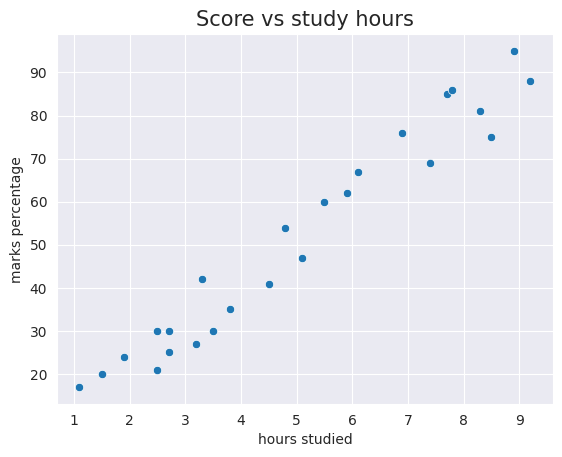

In [11]:
sns.set_style('darkgrid')
sns.scatterplot(y=df['Scores'],x=df['Hours'])
plt.title('Score vs study hours',size=15)
plt.ylabel('marks percentage')
plt.xlabel('hours studied')
plt.show()



from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-Squared',metrics.r2_score(y_test,y_pred))

metricsFrom the graphs, we can see a positive relationship between the percentage scores and hours of study.



## **Model Training**

In [12]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [13]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



## **Model Selection**

In [14]:
from sklearn.linear_model import LinearRegression  
lr= LinearRegression()  
lr.fit(x_train, y_train) 

LinearRegression()

In [15]:
y_pred = lr.predict(x_test)

predictions = pd.DataFrame({'Hours':[i[0] for i in x_test],'Predicted scores':[s for s in y_pred]})
predictions

,Hours,Predicted scores
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [16]:
#Comparing the actual value with the predicted value
comparison=pd.DataFrame({'Actual score': y_test,'Predicted score':y_pred})
comparison

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


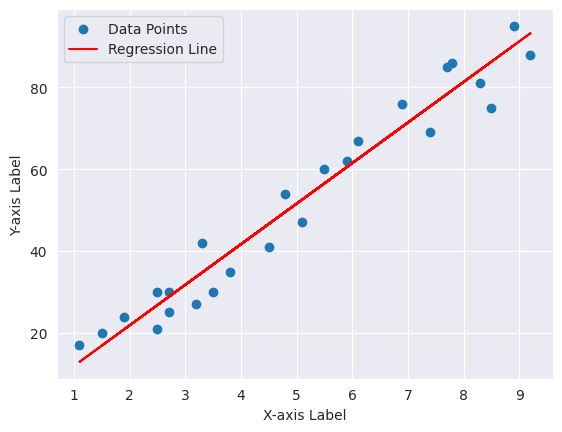

In [17]:
# Scatter plot for the data points
plt.scatter(x, y, label='Data Points')

# Plotting the regression line using the model's predictions
plt.plot(x, lr.predict(x), color='red', label='Regression Line')

# Labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()

# Display the plot
plt.show()


## **Model Evaluation**

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-Squared',metrics.r2_score(y_test,y_pred))


Mean Absolute Error: 4.183859899002982
RMSE: 4.647447612100373
R-Squared 0.9454906892105354


## **Prediction on new data.**

In [19]:
hours = 9.25
predicted = lr.predict([[hours]])
print("Number of hours =", hours)
print("Predicted score is =", predicted[0])
print("Scores= {}".format(round(predicted[0],3)))

Number of hours = 9.25
Predicted score is = 93.69173248737539
Scores= 93.692


#### According to the regression model if a student studies for **9.25 hours** a day he/she is likely to score **93.692 marks**.